In [2]:
import torch
import numpy as np 
import pandas as pd
from scipy import io 

import pickle
from src.datasets.uniform_dataset import create_dataloaders_zipfian,create_dataloaders_uniform

import matplotlib.pyplot as plt
from collections import Counter


In [4]:
def count_numerosities_in_epoch(data_loader):
    counter = Counter()
    for images, labels in data_loader:
        counter.update(labels.tolist())
    return dict(sorted(counter.items()))


train_loader, val_loader, test_loader = create_dataloaders_uniform(
    "/home/student/Desktop/Groundeep/stimuli_dataset_final_hybrid",
    "stimuli_dataset_hybrid.npz",
    batch_size=10000,
    num_workers=1,
    val_size=0.02
)

epoch_counts = count_numerosities_in_epoch(train_loader)

print("Numero di volte che ogni numerosità è vista in un'epoca:")
for k, v in epoch_counts.items():
    print(f"Numerosità {k}: {v}")


/home/student/Desktop/Groundeep/src/datasets/uniform_dataset.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = (torch.tensor(self.data[idx])!=0 ).float()  # normalize the images


Numero di volte che ogni numerosità è vista in un'epoca:
Numerosità 1.0: 1560
Numerosità 2.0: 1560
Numerosità 3.0: 1560
Numerosità 4.0: 1560
Numerosità 5.0: 1560
Numerosità 6.0: 1560
Numerosità 7.0: 1560
Numerosità 8.0: 1560
Numerosità 9.0: 1560
Numerosità 10.0: 1560
Numerosità 11.0: 1560
Numerosità 12.0: 1560
Numerosità 13.0: 1560
Numerosità 14.0: 1560
Numerosità 15.0: 1560
Numerosità 16.0: 1560
Numerosità 17.0: 1560
Numerosità 18.0: 1560
Numerosità 19.0: 1560
Numerosità 20.0: 1560
Numerosità 21.0: 1560
Numerosità 22.0: 1560
Numerosità 23.0: 1560
Numerosità 24.0: 1560
Numerosità 25.0: 1560
Numerosità 26.0: 1560
Numerosità 27.0: 1560
Numerosità 28.0: 1560
Numerosità 29.0: 1560
Numerosità 30.0: 1560
Numerosità 31.0: 1560
Numerosità 32.0: 1560


In [5]:
data = np.load('/home/student/Desktop/Groundeep/stimuli_dataset_final/stimuli_dataset.npz')

np.unique(data['N_list'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.], dtype=float32)

In [8]:
train_loader, val_loader, test_loader = create_dataloaders_uniform(
    "/home/student/Desktop/Groundeep/circle_dataset_100x100",
    "circle_dataset_100x100_v2.npz",
    batch_size=128,
    num_workers=1,
    val_size=0.02
)

ca_arr = np.array(train_loader.dataset.dataset.cumArea_list)
bins = np.linspace(ca_arr.min(), ca_arr.max(), 100)
digitized = np.digitize(ca_arr, bins)
num_bins = len(np.unique(digitized))
print(f"Binned cumulative area levels: {num_bins}")




Binned cumulative area levels: 99


In [16]:
one_sample_us = batch[0].reshape(-1,100,100)[0,:,:]

In [12]:
len(one_sample_us.unique())

69

In [13]:
print(one_sample_us.unique())
one_sample_D = data[0,:,:]
print(np.unique(one_sample_D))


tensor([0.0000e+00, 6.8260e-11, 2.7674e-08, 2.7674e-08, 5.5281e-08, 5.5349e-08,
        8.2955e-08, 2.5869e-07, 2.8637e-07, 3.1397e-07, 4.8971e-07, 5.1731e-07,
        5.1738e-07, 7.7607e-07, 1.0070e-06, 1.0348e-06, 1.1451e-05, 1.1506e-05,
        1.1682e-05, 1.1710e-05, 1.1737e-05, 2.3133e-05, 1.0511e-04, 1.0511e-04,
        1.0511e-04, 1.1679e-04, 1.9857e-04, 1.9857e-04, 1.9857e-04, 1.9877e-04,
        1.9877e-04, 1.9900e-04, 1.9900e-04, 2.0973e-04, 2.0976e-04, 2.0979e-04,
        3.9734e-04, 1.0741e-03, 1.0746e-03, 1.1677e-03, 1.1677e-03, 1.1682e-03,
        1.2838e-03, 1.3665e-03, 1.8671e-03, 1.8785e-03, 1.8788e-03, 1.9606e-03,
        1.9608e-03, 2.1594e-03, 2.1703e-03, 2.7426e-03, 2.7538e-03, 2.7653e-03,
        3.6179e-03, 3.6180e-03, 3.6184e-03, 3.7116e-03, 3.7118e-03, 3.7118e-03,
        3.7123e-03, 3.7225e-03, 3.7226e-03, 3.9096e-03, 3.9099e-03, 3.9210e-03,
        3.9211e-03, 3.9215e-03, 3.9216e-03])
[-6.35375977e-02 -5.65338135e-02 -5.25054932e-02 -5.02929688e-02
 -4.600524

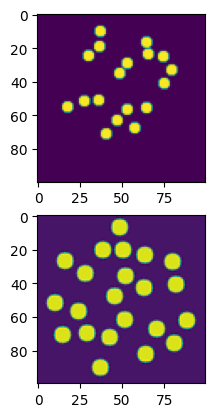

In [14]:
fig,ax = plt.subplots(2,1)
ax[0].imshow(one_sample_us)
ax[1].imshow(one_sample_D)



In [8]:
def plot_single_architecture_projection(arch_id, embeddings_dict, features_dict, method_name, output_dir, dist_name, feat_name="log"):
    import matplotlib.pyplot as plt
    import umap
    from sklearn.decomposition import PCA
    import os
    import numpy as np

    os.makedirs(output_dir, exist_ok=True)
    reducer = umap.UMAP(n_components=2, random_state=42) if method_name == "UMAP" else PCA(n_components=2)

    emb = embeddings_dict[arch_id]
    emb_2d = reducer.fit_transform(emb)

    if feat_name == "log":
        color_values = features_dict["log"][arch_id]
        tick_labels = features_dict["numerosity"][arch_id]
    else:
        color_values = features_dict[feat_name][arch_id]
        tick_labels = color_values

    plt.figure(figsize=(7, 6))
    sc = plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=color_values, cmap='viridis', s=40)

    plt.xticks([])  # remove x-axis ticks
    plt.yticks([])  # remove y-axis ticks

    cbar = plt.colorbar(sc)
    if feat_name == "log":
        cbar.set_ticks(np.linspace(min(color_values), max(color_values), 5))

    plt.tight_layout()
    fname = f"{arch_id}_{method_name.lower()}_{dist_name}_{feat_name}.pdf"
    plt.savefig(os.path.join(output_dir, fname), format='pdf', dpi=300)
    plt.close()
    print(f"✅ Saved: {fname}")

def plot_single_architecture_projection_pca(arch_id, embeddings_dict, features_dict, output_dir, dist_name, feat_name="log", method_name="PCA"):
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    import os
    import numpy as np

    os.makedirs(output_dir, exist_ok=True)
    reducer = PCA(n_components=2)

    emb = embeddings_dict[arch_id]
    emb_2d = reducer.fit_transform(emb)

    if feat_name == "log":
        color_values = features_dict["log"][arch_id]
        tick_labels = features_dict["numerosity"][arch_id]
    else:
        color_values = features_dict[feat_name][arch_id]
        tick_labels = color_values

    plt.figure(figsize=(7, 6))
    sc = plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=color_values, cmap='viridis', s=40)

    plt.xticks([])  # remove x-axis ticks
    plt.yticks([])  # remove y-axis ticks

    cbar = plt.colorbar(sc)
    if feat_name == "log":
        cbar.set_ticks(np.linspace(min(color_values), max(color_values), 5))

    plt.tight_layout()
    fname = f"{arch_id}_{method_name.lower()}_{dist_name}_{feat_name}.pdf"
    plt.savefig(os.path.join(output_dir, fname), format='pdf', dpi=300)
    plt.close()
    print(f"✅ Saved: {fname}")



In [9]:
import os
import numpy as np
from glob import glob
from src.analyses.embedding_analysis import Embedding_analysis

# === CONFIGURAZIONE ===
dist_name = "uniform"  # o "zipfian"
data_path = "/home/student/Desktop/Groundeep/circle_dataset_100x100/"
data_file = "circle_dataset_100x100_v2.npz"
network_dir = "/home/student/Desktop/Groundeep/networks/uniform/idbn_new_dataset"
output_dir = "/home/student/Desktop/Groundeep/images_for_abstract"   # cambia se zipfian

# === OUTPUT ===
pkl_files = glob(os.path.join(network_dir, "*.pkl"))

# === DIZIONARI PER SALVATAGGIO ===
embeddings_dict = {}
features_by_arch = {
    "linear": {},
    "log": {},
    "sqrt": {},
    "numerosity": {},
    "cumArea": {},
    "FA": {},
    "CH": {}
}

# === ESTRAZIONE ===
for pkl_path in pkl_files:
    arch_name = os.path.splitext(os.path.basename(pkl_path))[0]
    analyser = Embedding_analysis(data_path, data_file, pkl_path, pkl_path, arch_name)
    output_dict = analyser._get_encodings()

    embeddings = np.array(output_dict[f'Z_{dist_name}'], dtype=np.float64)
    numerosities = np.array(output_dict[f'labels_{dist_name}'])
    cumArea = np.array(output_dict[f'cumArea_{dist_name}'])
    FA = np.array(output_dict[f'FA_{dist_name}'])
    CH = np.array(output_dict[f'CH_{dist_name}'])

    embeddings_dict[arch_name] = embeddings
    features_by_arch["linear"][arch_name] = numerosities
    features_by_arch["log"][arch_name] = np.log1p(numerosities)
    features_by_arch["sqrt"][arch_name] = np.sqrt(numerosities)
    features_by_arch["numerosity"][arch_name] = numerosities
    features_by_arch["cumArea"][arch_name] = cumArea
    features_by_arch["FA"][arch_name] = FA
    features_by_arch["CH"][arch_name] = CH

target_arch = "idbn_new_dataset_idbn_trained_uniform_1500_2000"

# Choose method and feature
method = "UMAP"  # or "PCA"
feat_name = "log"
dist_name = "uniform"  # or "zipfian"

# Call the function
plot_single_architecture_projection(
    arch_id=target_arch,
    embeddings_dict=embeddings_dict,
    features_dict=features_by_arch,
    method_name=method,
    output_dir=output_dir,
    dist_name=dist_name,
    feat_name=feat_name
)

plot_single_architecture_projection_pca(
    arch_id=target_arch,
    embeddings_dict=embeddings_dict,
    features_dict=features_by_arch,
    output_dir=output_dir,
    dist_name=dist_name,
    feat_name=feat_name
)


/home/student/Desktop/Groundeep/groundeep/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/student/Desktop/Groundeep/groundeep/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✅ Saved: idbn_new_dataset_idbn_trained_uniform_1500_2000_umap_uniform_log.pdf
✅ Saved: idbn_new_dataset_idbn_trained_uniform_1500_2000_pca_uniform_log.pdf
